<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico I - Estadística </h1>
<h3> Análisis y Visualización de Datos - 2019 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10. Usaremos una [versión ya limpia del dataset](https://www.kaggle.com/gsutters/the-human-freedom-index/home) que pueden descargar desde Kaggle.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con dos estimadores principales: *hf_score* que hace referencia a Human Freedom, y *ef_score* que hace referencia a Economic Freedom. Estos dos estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [18]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [19]:
seaborn.__version__

'0.9.0'

In [35]:
dataset = pandas.read_csv('../datasets/hfi_cc_2018.csv')
dataset.shape

(1458, 123)

In [36]:
dataset.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [37]:
important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [38]:
dataset

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0
5,2016,AUS,Australia,Oceania,8.439110,7.525648,7.364078,7.776279,9.623538,10.0,...,7.238900,8.944387,8.823021,8.121631,8.465526,7.98,10.0,8.582219,4.0,1.0
6,2016,AUT,Austria,Western Europe,8.969832,7.872188,7.673227,8.171749,9.737912,10.0,...,6.418890,7.296116,8.531578,7.419870,7.371334,7.58,27.0,8.413474,16.0,1.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,NaN,NaN,NaN,4.270861,9.143499,10.0,...,5.353533,6.959699,7.814181,7.080078,6.874880,6.49,106.0,6.083277,130.0,4.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,6.930835,6.008696,6.262840,6.400790,0.000000,10.0,...,NaN,7.981672,7.388227,7.523034,8.169125,7.34,49.0,7.397269,50.0,2.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,NaN,NaN,5.900339,9.790481,10.0,...,6.596745,8.074670,9.680534,8.018774,7.415786,7.56,30.0,6.848035,75.0,2.0


In [40]:
dataset = dataset[important_cols]
#dataset_regions = dataset['region'].drop_duplicates()
dataset_regions = dataset['region'].unique()
dataset_regions

dataset.shape
dataset

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0
5,2016,AUS,Australia,Oceania,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250000,7.98,10.0,8.582219,4.0
6,2016,AUT,Austria,Western Europe,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,7.58,27.0,8.413474,16.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,6.49,106.0,6.083277,130.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.34,49.0,7.397269,50.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,0.0,0.0,0.0,10.0,10.0,10.0,0.0,3.333333,7.56,30.0,6.848035,75.0


In [25]:
numb_columns = dataset.iloc[:,4:]
numb_columns

for n_c in numb_columns:
    print(n_c, dataset[n_c].max() - dataset[n_c].min())

pf_identity_legal 10.0
pf_identity_parental_marriage 10.0
pf_identity_parental_divorce 10.0
pf_identity_parental 10.0
pf_identity_sex_male 10.0
pf_identity_sex_female 10.0
pf_identity_sex 10.0
pf_identity_divorce 10.0
pf_identity 10.0
ef_score 6.31
ef_rank 161.0
hf_score 5.360486062
hf_rank 161.0


In [26]:
for region in dataset_regions:
    print('Region = ', region)
    print('ef_score = ', dataset[dataset['region'] == region]['ef_score'].mean())
    print('hf_score = ', dataset[dataset['region'] == region]['hf_score'].mean(), '\n')

print('Media global')
print('ef_score = ', dataset['ef_score'].mean())
print('hf_score = ', dataset['hf_score'].mean())

Region =  Eastern Europe
ef_score =  7.104473684210527
hf_score =  7.671637032810532 

Region =  Middle East & North Africa
ef_score =  6.556999999999999
hf_score =  6.051463809406664 

Region =  Sub-Saharan Africa
ef_score =  6.135258620689657
hf_score =  6.25684954989943 

Region =  Latin America & the Caribbean
ef_score =  6.734870689655169
hf_score =  7.047981929952582 

Region =  Caucasus & Central Asia
ef_score =  7.030576923076922
hf_score =  6.879505569384616 

Region =  Oceania
ef_score =  7.484722222222222
hf_score =  7.858762124638888 

Region =  Western Europe
ef_score =  7.588086419753088
hf_score =  8.368293307882713 

Region =  South Asia
ef_score =  6.655808823529416
hf_score =  6.533740138257352 

Region =  North America
ef_score =  7.956666666666667
hf_score =  8.4619146155 

Region =  East Asia
ef_score =  7.534999999999997
hf_score =  7.813019860851851 

Media global
ef_score =  6.785609579100155
hf_score =  6.9934437555145


In [27]:
for region in dataset_regions:
    print('Region = ', region)
    print('pf_identity = ', dataset[dataset['region'] == region]['pf_identity'].mean(), '\n')
    #print('pf_score = ', dataset[dataset['region'] == region]['pf_score'].mean(), '\n')

print('Media global')
print('pf_identity = ', dataset['pf_identity'].mean())
#print('pf_score = ', dataset['pf_score'].mean())

Region =  Eastern Europe
pf_identity =  9.68333333333158 

Region =  Middle East & North Africa
pf_identity =  2.8299999999733334 

Region =  Sub-Saharan Africa
pf_identity =  5.567049808431034 

Region =  Latin America & the Caribbean
pf_identity =  8.765086206909483 

Region =  Caucasus & Central Asia
pf_identity =  8.714743589673075 

Region =  Oceania
pf_identity =  9.152777777777779 

Region =  Western Europe
pf_identity =  9.871399176950616 

Region =  South Asia
pf_identity =  5.735294117639706 

Region =  North America
pf_identity =  9.833333333333334 

Region =  East Asia
pf_identity =  9.86111111111111 

Media global
pf_identity =  7.33417997096807


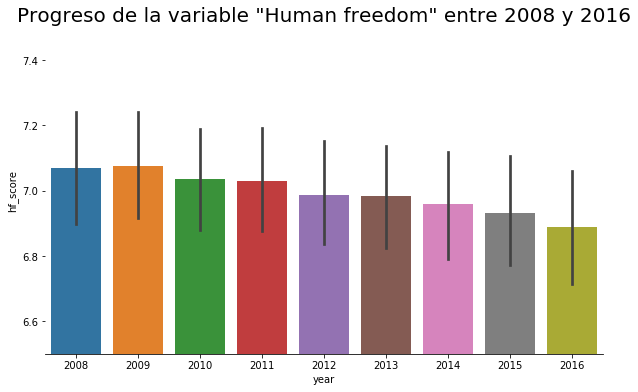

In [28]:
plt.figure(figsize=(10,6))
seaborn.barplot(data=dataset, x='year', y='hf_score')
plt.ylim(6.5, 7.5)
plt.title('Progreso de la variable "Human freedom" entre 2008 y 2016', fontsize=20)
seaborn.despine(left=True)

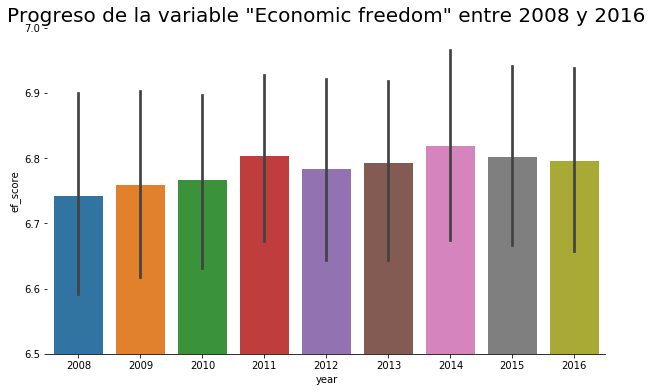

In [29]:
plt.figure(figsize=(10,6))
seaborn.barplot(data=dataset, x='year', y='ef_score')
plt.ylim(6.5, 7)
plt.title('Progreso de la variable "Economic freedom" entre 2008 y 2016', fontsize=20)
seaborn.despine(left=True)

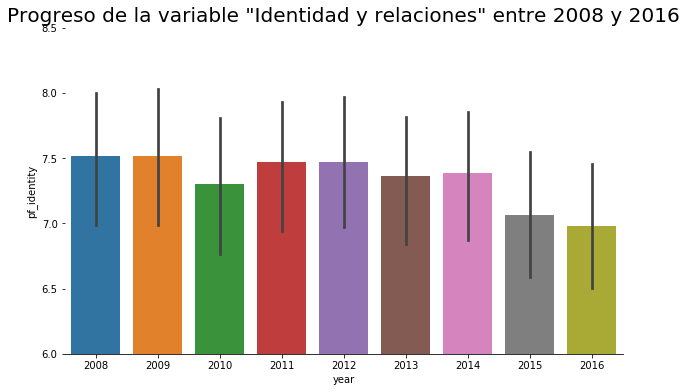

In [30]:
plt.figure(figsize=(10,6))
seaborn.barplot(data=dataset, x='year', y='pf_identity')
plt.ylim(6, 8.5)
plt.title('Progreso de la variable "Identidad y relaciones" entre 2008 y 2016', fontsize=20)
seaborn.despine(left=True)

## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda? 
  3. ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?
  4. ¿Cómo pueden sanearse los valores faltantes?
  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  
  

## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Hint: hay un gráfico de seaborn que hace todo por vos!

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

## 2. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?
  2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.
  3. Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar a,bas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.
  4. Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

## 3. Correlaciones

En este ejercicio queremos responder a las preguntas

* Las libertades sociales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades individuales y respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, hf_score y ef_score. 

Como pf_indentity contribuye al cálculo de hf_score y ef_score, esperamos hallar algún grado de correlación. Sin embargo, queremos medir qué tanta correlación. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.
3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)


In [14]:
print(dataset['pf_identity'].mean())
print(dataset['pf_identity'].median())

#dataset[dataset]
print(dataset[dataset['region'] == 'Latin America & the Caribbean']['pf_identity'].mean())

7.33417997096807
9.166666667000001
8.765086206909483


In [15]:
dataset

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0
5,2016,AUS,Australia,Oceania,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250000,7.98,10.0,8.582219,4.0
6,2016,AUT,Austria,Western Europe,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,7.58,27.0,8.413474,16.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,6.49,106.0,6.083277,130.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.34,49.0,7.397269,50.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,0.0,0.0,0.0,10.0,10.0,10.0,0.0,3.333333,7.56,30.0,6.848035,75.0


(3, 9)

<Figure size 720x432 with 0 Axes>

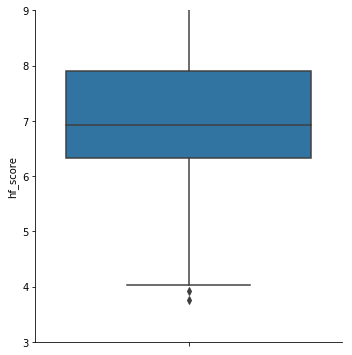

In [16]:
plt.figure(figsize=(10,6))

catplot_data = dataset

seaborn.catplot(data=catplot_data, y='hf_score', order='region', kind='box')
#plt.title('Boxplot de hf_score en latam + caribe', size=20)
plt.ylim(3,9)
#seaborn.despine(left=True)

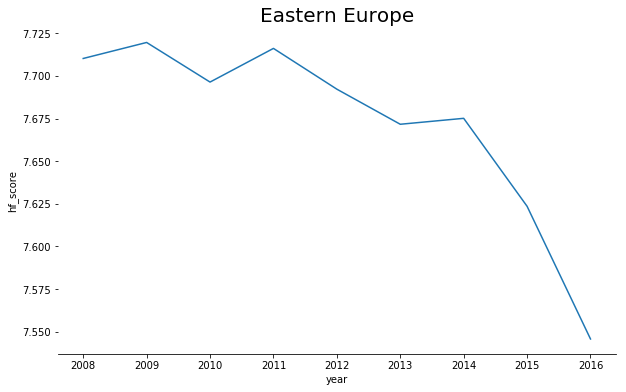

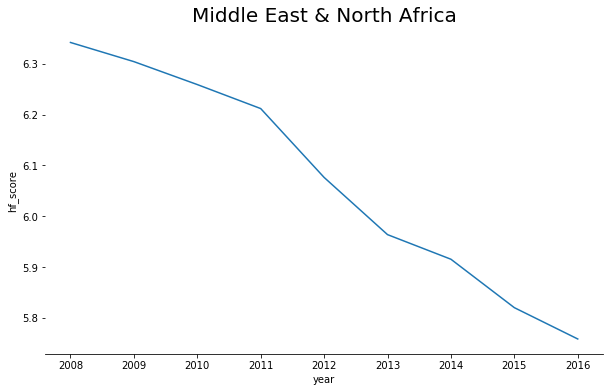

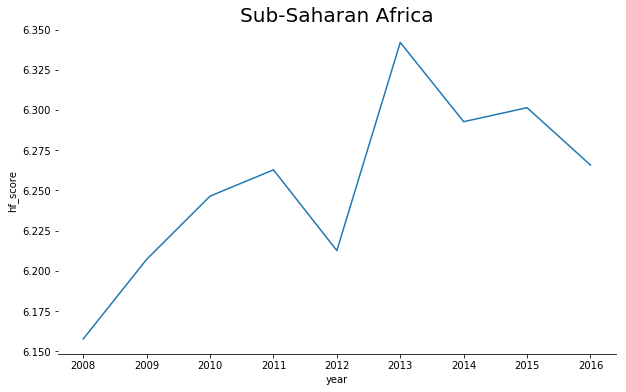

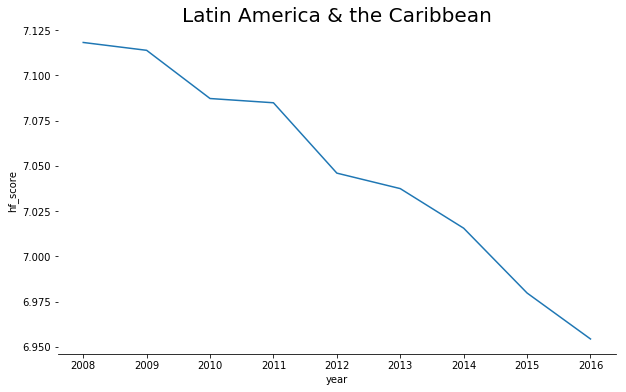

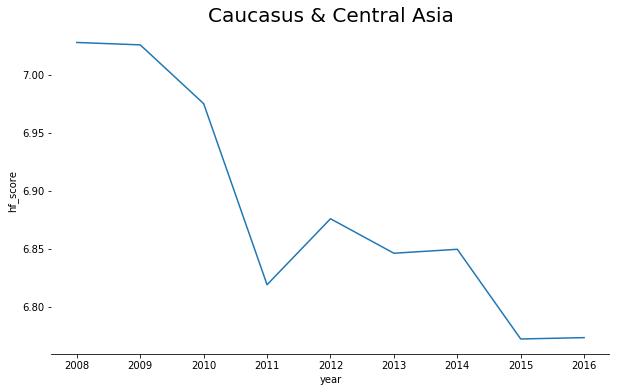

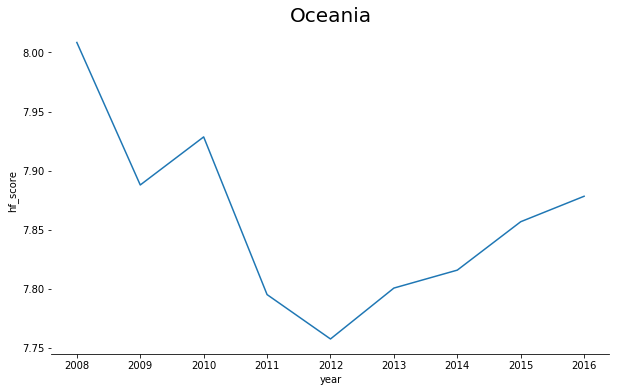

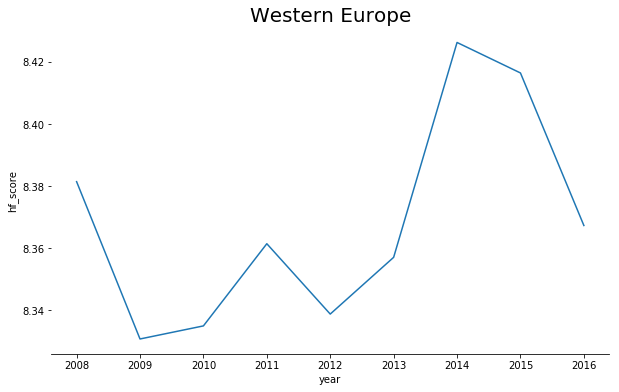

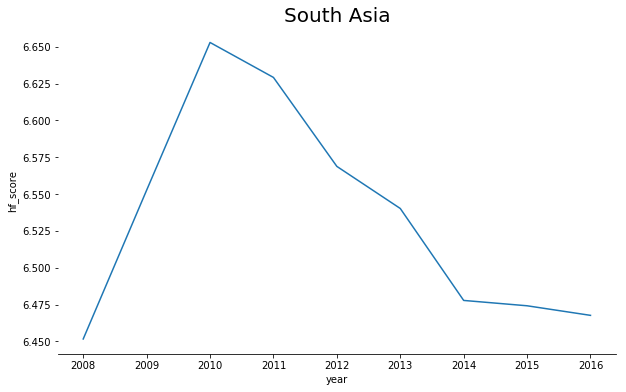

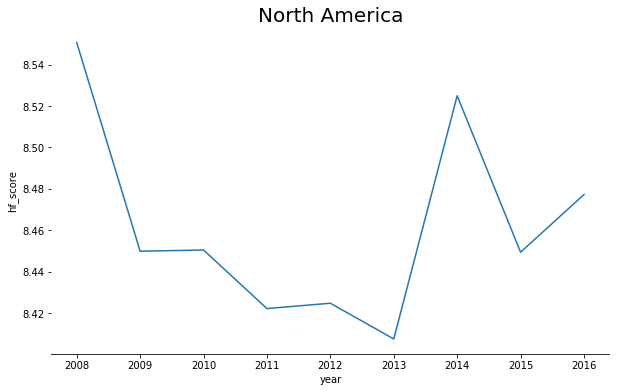

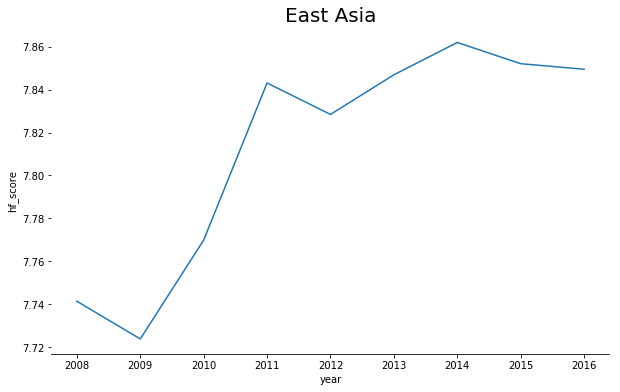

In [17]:
regions = dataset['region'].unique()
for region in regions:
  plt.figure(figsize=(10,6))
  seaborn.lineplot(data=dataset[dataset['region'] == region], y='hf_score', x='year', ci=None)
  plt.title(region, size=20)
  #plt.ylim(5,9.5)
  seaborn.despine(left=True)

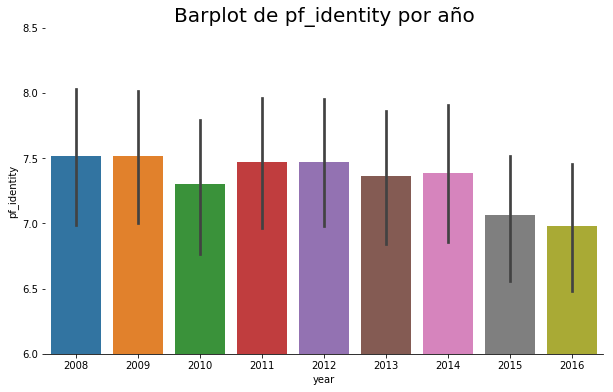

In [31]:
plt.figure(figsize=(10,6))
seaborn.barplot(data=dataset, y='pf_identity', x='year')
plt.title('Barplot de pf_identity por año', size=20)
plt.ylim(6,8.5)
seaborn.despine(left=True)

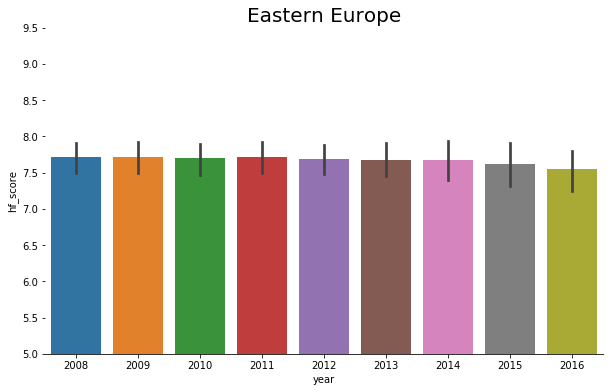

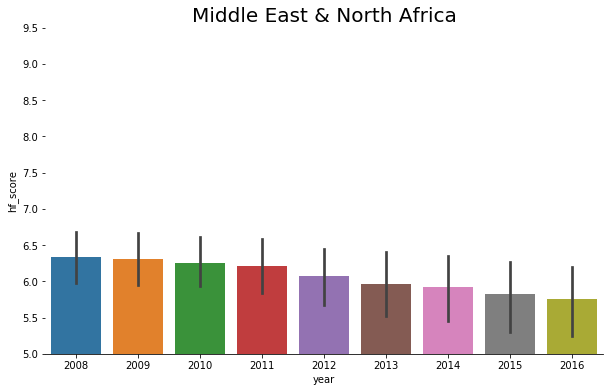

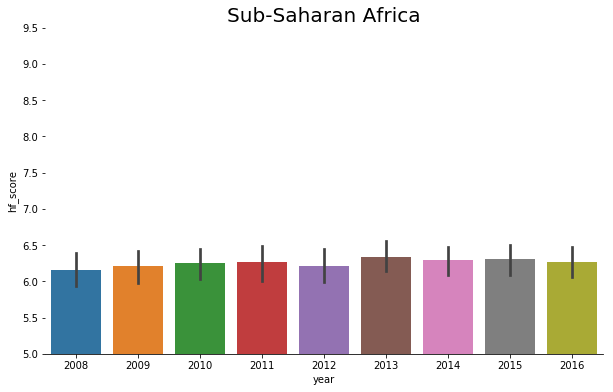

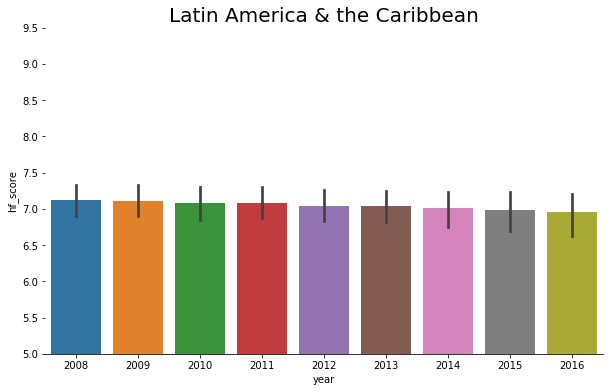

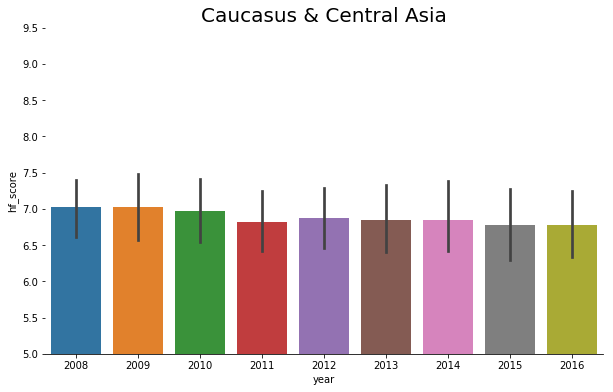

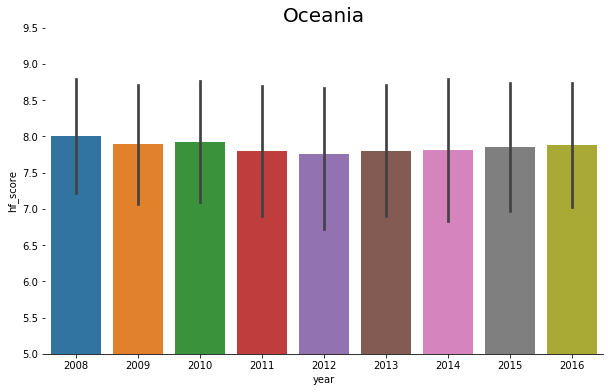

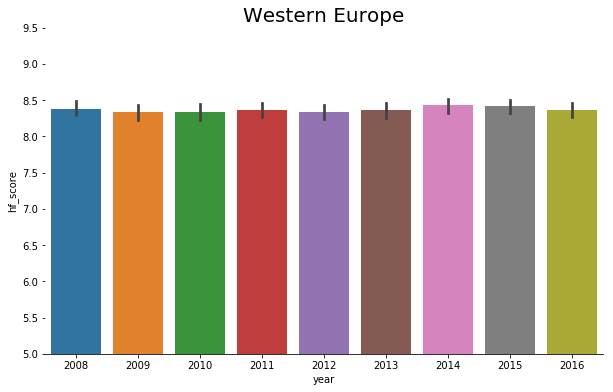

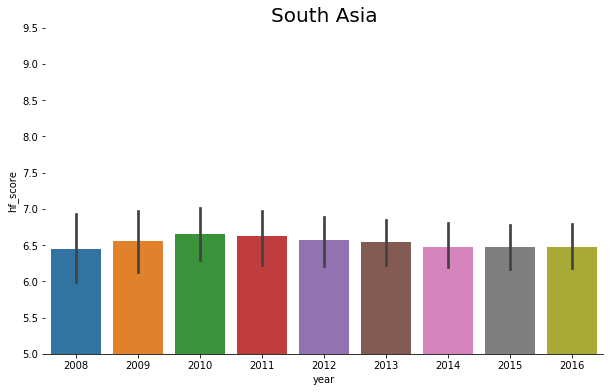

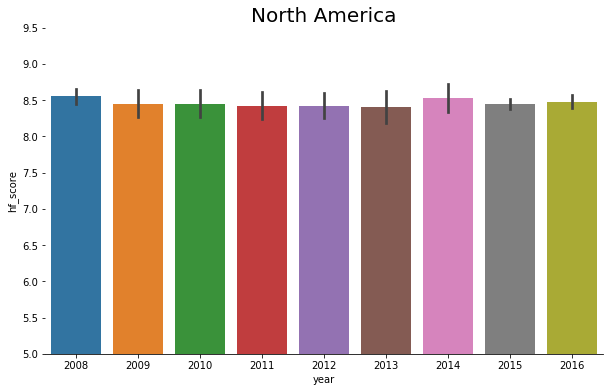

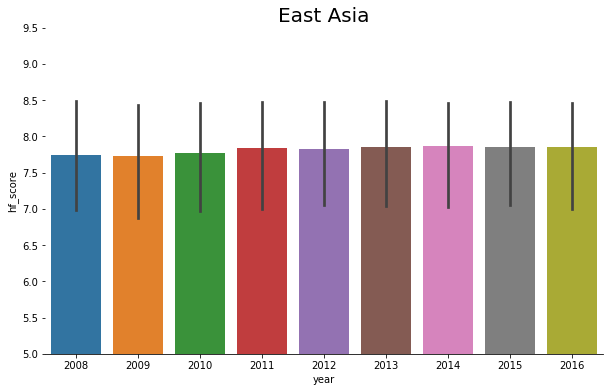

In [32]:
regions = dataset['region'].unique()
for region in regions:
  plt.figure(figsize=(10,6))
  seaborn.barplot(data=dataset[dataset['region'] == region], y='hf_score', x='year')
  plt.title(region, size=20)
  plt.ylim(5,9.5)
  seaborn.despine(left=True)

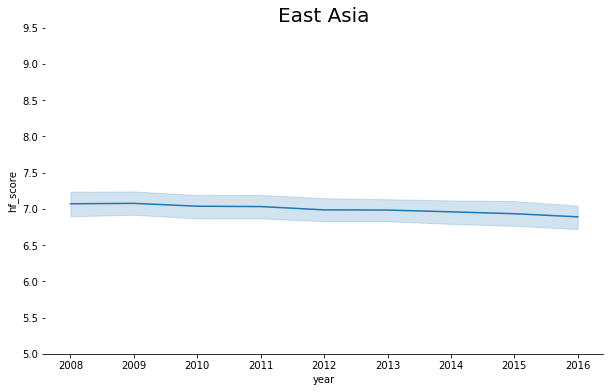

In [34]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=dataset, y='hf_score', x='year')
plt.title(region, size=20)
plt.ylim(5,9.5)
seaborn.despine(left=True)

In [56]:
ds_latam = dataset[dataset['region'] == 'Latin America & the Caribbean']
ds_latam

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.34,49.0,7.397269,50.0
11,2016,BRD,Barbados,Latin America & the Caribbean,NaN,10.0,10.0,10.0,0.0,0.0,0.0,NaN,5.000000,6.43,111.0,7.068447,67.0
14,2016,BLZ,Belize,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,6.86,83.0,7.145432,64.0
17,2016,BOL,Bolivia,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,6.23,123.0,6.718385,92.0
20,2016,BRA,Brazil,Latin America & the Caribbean,0.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,7.500000,5.75,144.0,6.207989,123.0
31,2016,CHL,Chile,Latin America & the Caribbean,0.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,5.000000,7.80,15.0,8.008018,32.0
33,2016,COL,Colombia,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,6.50,105.0,6.760757,87.0
36,2016,CRI,Costa Rica,Latin America & the Caribbean,0.0,5.0,10.0,7.5,10.0,10.0,10.0,10.0,6.875000,7.55,33.0,7.857714,37.0
42,2016,DOM,Dominican Rep.,Latin America & the Caribbean,0.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,7.500000,7.18,62.0,7.061287,69.0


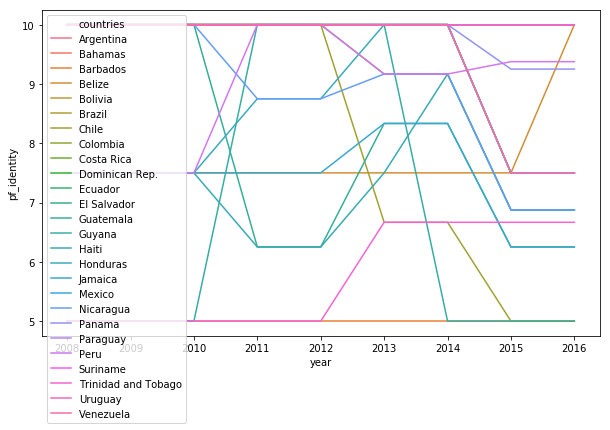

In [72]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=ds_latam, y='pf_identity', x='year', hue='countries', ci=None)

Brazil
Chile
Costa Rica
Dominican Rep.
El Salvador
Guatemala
Haiti
Jamaica
Nicaragua
Panama
Paraguay
Venezuela


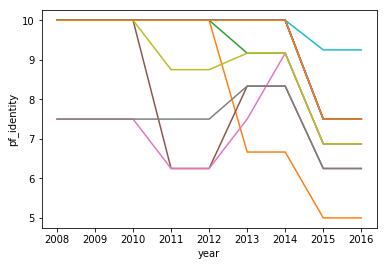

In [170]:
countries = list(ds_latam['countries'].unique())
years = ds_latam['year'].unique()

for country in countries:
    result = ds_latam[ds_latam['countries'] == country]['pf_identity']
    result = pandas.Series.tolist(result)
    result = result[8] - result[0]
    if result > 0:
        print(country)
        #plt.figure(figsize=(10,6))
        seaborn.lineplot(data=ds_latam[ds_latam['countries'] == country], y='pf_identity', x='year', ci=None)
        #plt.legend()

In [114]:
import itertools

groups = itertools.groupby(countries, key = lambda x: x[2])
print(list(groups))

[('g', <itertools._grouper object at 0x7f1f8c760f98>), ('h', <itertools._grouper object at 0x7f1f8c7603c8>), ('r', <itertools._grouper object at 0x7f1f8c760d68>), ('l', <itertools._grouper object at 0x7f1f8c7605f8>), ('a', <itertools._grouper object at 0x7f1f8c7602b0>), ('i', <itertools._grouper object at 0x7f1f8c760518>), ('l', <itertools._grouper object at 0x7f1f8c8cc7b8>), ('s', <itertools._grouper object at 0x7f1f9079c4a8>), ('m', <itertools._grouper object at 0x7f1f9079ca20>), ('u', <itertools._grouper object at 0x7f1f8c864cf8>), (' ', <itertools._grouper object at 0x7f1f8c8647f0>), ('a', <itertools._grouper object at 0x7f1f8c864390>), ('y', <itertools._grouper object at 0x7f1f8c8649e8>), ('i', <itertools._grouper object at 0x7f1f8c864780>), ('n', <itertools._grouper object at 0x7f1f8c864b70>), ('m', <itertools._grouper object at 0x7f1f8c864438>), ('x', <itertools._grouper object at 0x7f1f8c864ef0>), ('c', <itertools._grouper object at 0x7f1f8c864240>), ('n', <itertools._grouper o

In [115]:
ds_latam

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.34,49.0,7.397269,50.0
11,2016,BRD,Barbados,Latin America & the Caribbean,NaN,10.0,10.0,10.0,0.0,0.0,0.0,NaN,5.000000,6.43,111.0,7.068447,67.0
14,2016,BLZ,Belize,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,6.86,83.0,7.145432,64.0
17,2016,BOL,Bolivia,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,6.23,123.0,6.718385,92.0
20,2016,BRA,Brazil,Latin America & the Caribbean,0.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,7.500000,5.75,144.0,6.207989,123.0
31,2016,CHL,Chile,Latin America & the Caribbean,0.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,5.000000,7.80,15.0,8.008018,32.0
33,2016,COL,Colombia,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,6.50,105.0,6.760757,87.0
36,2016,CRI,Costa Rica,Latin America & the Caribbean,0.0,5.0,10.0,7.5,10.0,10.0,10.0,10.0,6.875000,7.55,33.0,7.857714,37.0
42,2016,DOM,Dominican Rep.,Latin America & the Caribbean,0.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,7.500000,7.18,62.0,7.061287,69.0


In [116]:
itertools.__version__

AttributeError: module 'itertools' has no attribute '__version__'

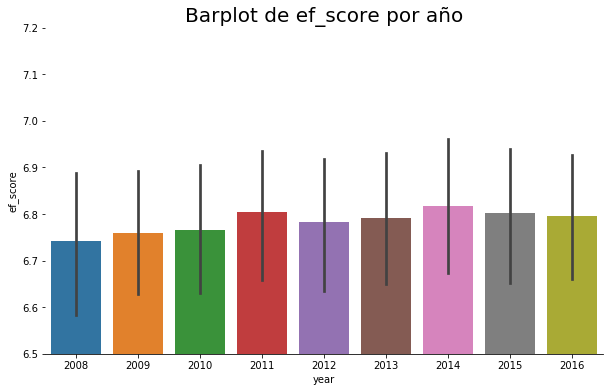

In [150]:
plt.figure(figsize=(10,6))
seaborn.barplot(data=dataset, y='ef_score', x='year')
plt.title('Barplot de ef_score por año', size=20)
plt.ylim(6.5,7.2)
seaborn.despine(left=True)

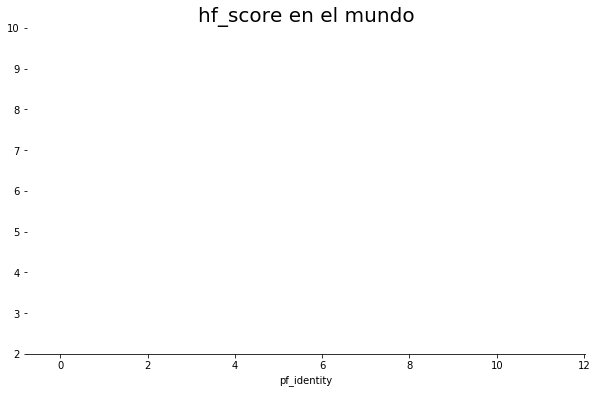

In [169]:
new_dataset = dataset.dropna()
#print(new_dataset.mean())
plt.figure(figsize=(10,6))
seaborn.distplot(new_dataset['pf_identity'])
plt.title('hf_score en el mundo', size=20)
plt.ylim(2,10)
seaborn.despine(left=True)